In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

plt.style.use('ggplot') 

# To NLP and Word Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

In [73]:
#Reading the dataset on pandas
strains = pd.read_csv("https://raw.githubusercontent.com/build-week-med-cabinet2/DS/main/dataset/cannabis.csv")

In [74]:
print(strains.shape)
strains.head()

(2351, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [75]:
print(strains.isnull().sum())
print(strains.info())

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


In [5]:
strains['Type'] = strains.Type.astype(str)
#Here looking though the data to see the structure
print(strains.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


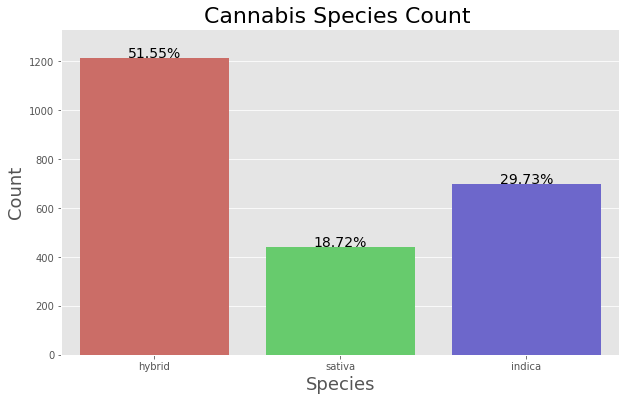

In [6]:
# look at the distribuition of each Types
total = len(strains)
plt.figure(figsize=(10,6))

g = sns.countplot(x="Type", data=strains, 
                  palette='hls', color='blue')
g.set_title("Cannabis Species Count ", fontsize=22)
g.set_xlabel('Species', fontsize=18)
g.set_ylabel('Count', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


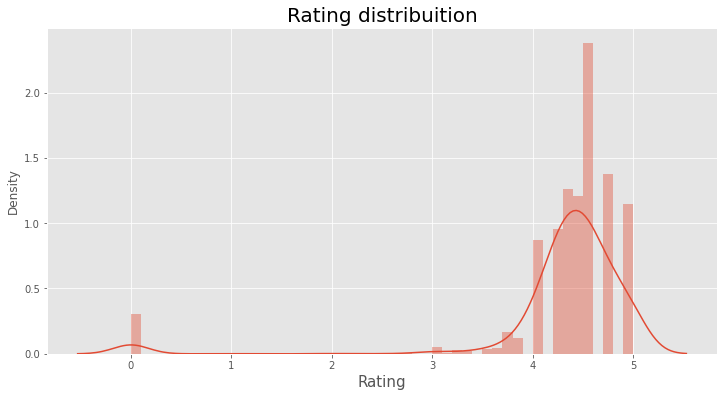

In [7]:
plt.figure(figsize=(12,6))

# Total the rating distribuition
g = sns.distplot(strains["Rating"],
                 bins=50)
g.set_title("Rating distribuition", 
            size = 20)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

In [8]:
print("Rating Distribuition by Species Type")
pd.crosstab(strains[strains.Rating > 3.0]['Rating'], strains.Type).T

Rating Distribuition by Species Type


Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Type,,,,,,,,,,,,,,,,,,,,
hybrid,1,1,2,2,5,6,7,9,9,62,56,113,150,144,164,114,95,88,31,102
indica,0,2,0,1,2,4,5,10,12,24,33,64,89,83,94,78,47,41,19,70
sativa,0,0,1,2,2,1,4,4,8,18,12,48,58,57,59,50,22,30,9,38


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

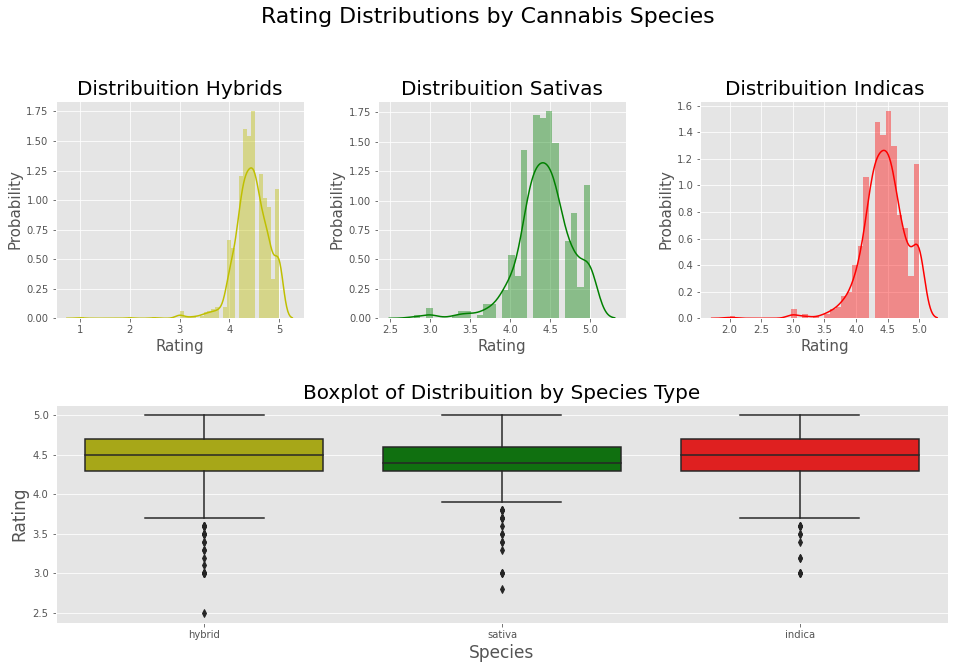

In [9]:
plt.figure(figsize=(16,10))

plt.suptitle('Rating Distributions by Cannabis Species', fontsize=22)

#Let's look the Rating distribuition by Type.
g = plt.subplot(231)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"],
                 color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"],
                  color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Probability", fontsize=15)
g1.set_title("Distribuition Sativas",
             fontsize=20)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Probability", fontsize=15)
g2.set_title("Distribuition Indicas", 
             fontsize=20)

g3 = plt.subplot(212)

my_pal = {"hybrid": "y", "sativa": "g", "indica":"r"}

#I will now explore the Rating distribuition by Type
g3 = sns.boxplot(x="Type",y="Rating",  palette=my_pal,
                data=strains[strains["Rating"] > 2])
g3.set_title("Boxplot of Distribuition by Species Type", 
            fontsize=20)
g3.set_xlabel("Species", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()

In [10]:
#I will extract the values in Effects and Flavor and pass to a new column
df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [11]:
#Concatenating the new variables with strains
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)

#Looking the result
strains.head()

strains.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

The top 5 First Effects related
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


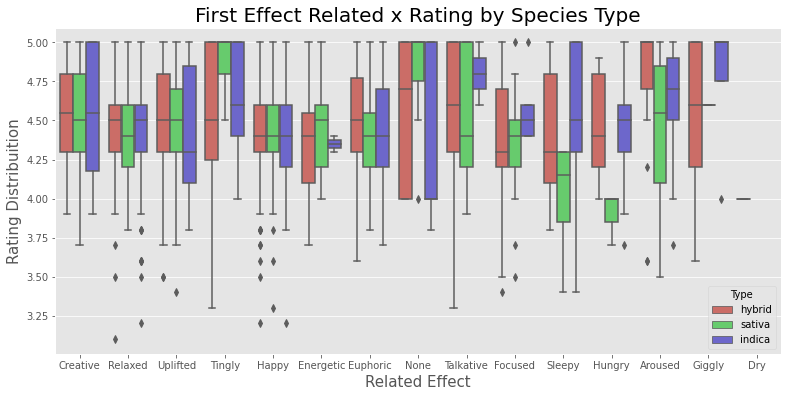

In [12]:
print("The top 5 First Effects related")
print(strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",
            fontsize=20)

plt.show()

The top 5 Second related Effects
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: Effect_2, dtype: int64


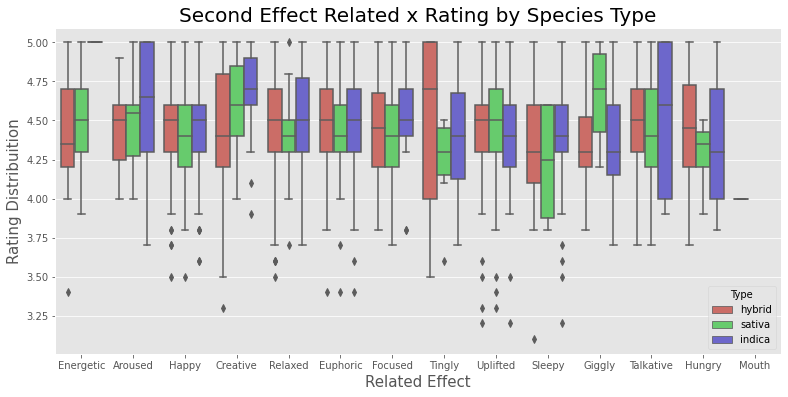

In [13]:
print("The top 5 Second related Effects")
print(strains['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",
            fontsize=20)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


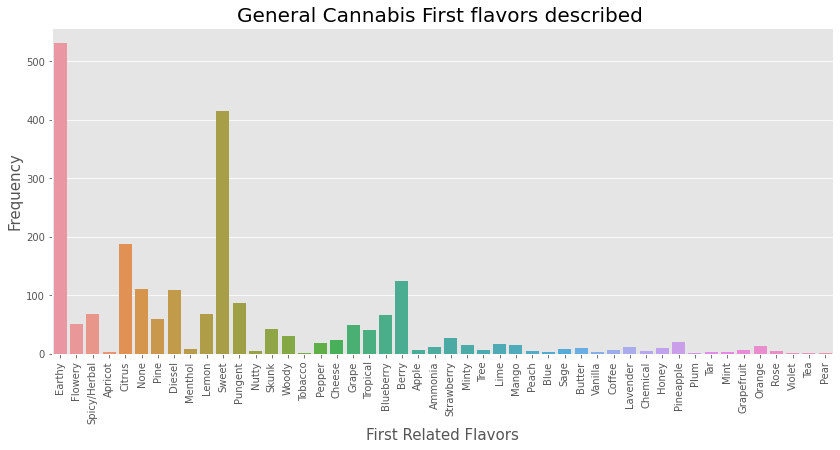

In [14]:
plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=strains)
plt.xticks(rotation=90)
plt.xlabel('First Related Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("General Cannabis First flavors described ",
          fontsize=20)
plt.show()

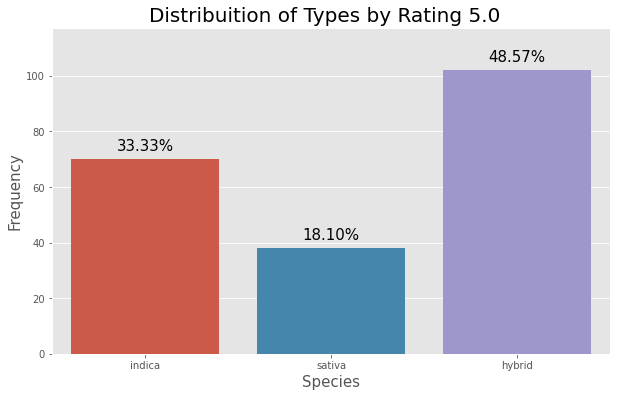

In [15]:
#Whats the type with most strains with rating 5?
total_rat5 = len(strains[strains["Rating"] == 5])

plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=strains[strains["Rating"] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", 
            fontsize=20)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_rat5 * 100),
            ha="center", fontsize=15) 
g.set_ylim(0,max(sizes)*1.15)

plt.show()

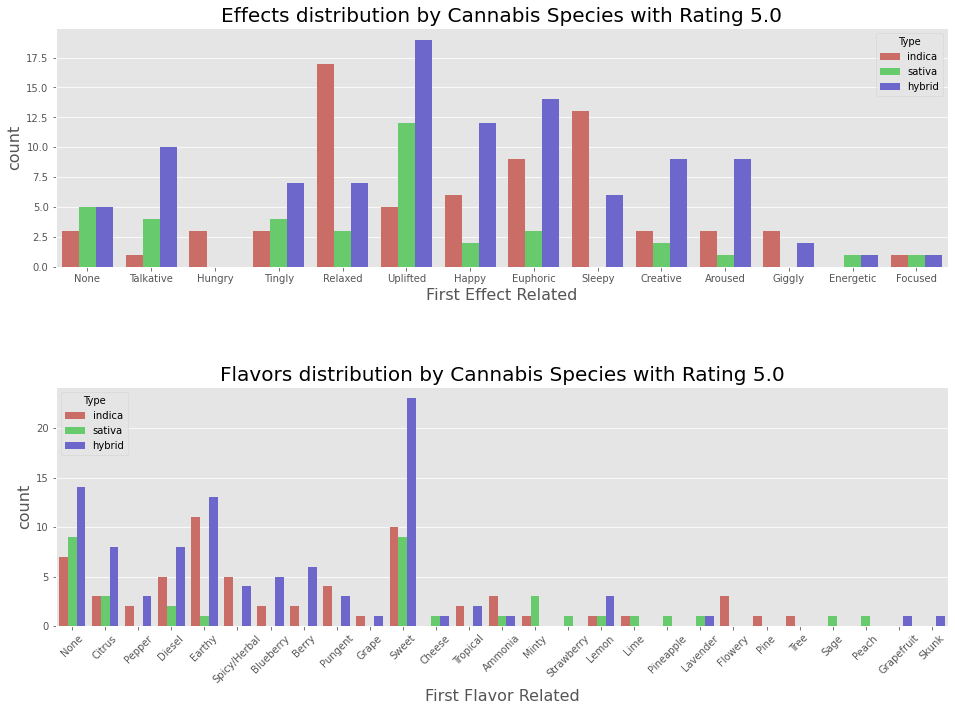

In [16]:
strains_top = strains[strains["Rating"] == 5]

plt.figure(figsize=(16,11))

plt.subplot(211)
g = sns.countplot(x ='Effect_1',data = strains_top,hue="Type",
              palette='hls')
g.set_title("Effects distribution by Cannabis Species with Rating 5.0", fontsize=20)
g.set_xlabel('First Effect Related', fontsize=16)
g.set_ylabel('count', fontsize=16)

plt.subplot(212)
g1 = sns.countplot(x ='Flavor_1',data = strains_top,hue="Type",
              palette='hls')
g1.set_title("Flavors distribution by Cannabis Species with Rating 5.0", fontsize=20)
g1.set_xlabel('First Flavor Related', fontsize=16)
g1.set_ylabel('count', fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5)

plt.show()

In [17]:
#Let's create subsets by each type and explore their Flavors and Effects
hibridas = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == 'indica']
sativas = strains[strains.Type == 'sativa']

In [18]:
#Now we can delete some columns that will not be useful
del strains["Effects"]
del strains["Flavor"]

In [19]:
#Creating the spliter by LiamLarsen 
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

In [20]:
#Runing flavors counts to sativas
sativa_effects = get_effects(sativas)
sativa_effects = pd.DataFrame.from_dict(sativa_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_effects = get_effects(indicas)
indica_effects = pd.DataFrame.from_dict(indica_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_effects = get_effects(hibridas)
hibridas_effects = pd.DataFrame.from_dict(hibridas_effects,
                                          orient='index').reset_index().rename(columns={'index': 'effects',
                                                                                        0:'count'})

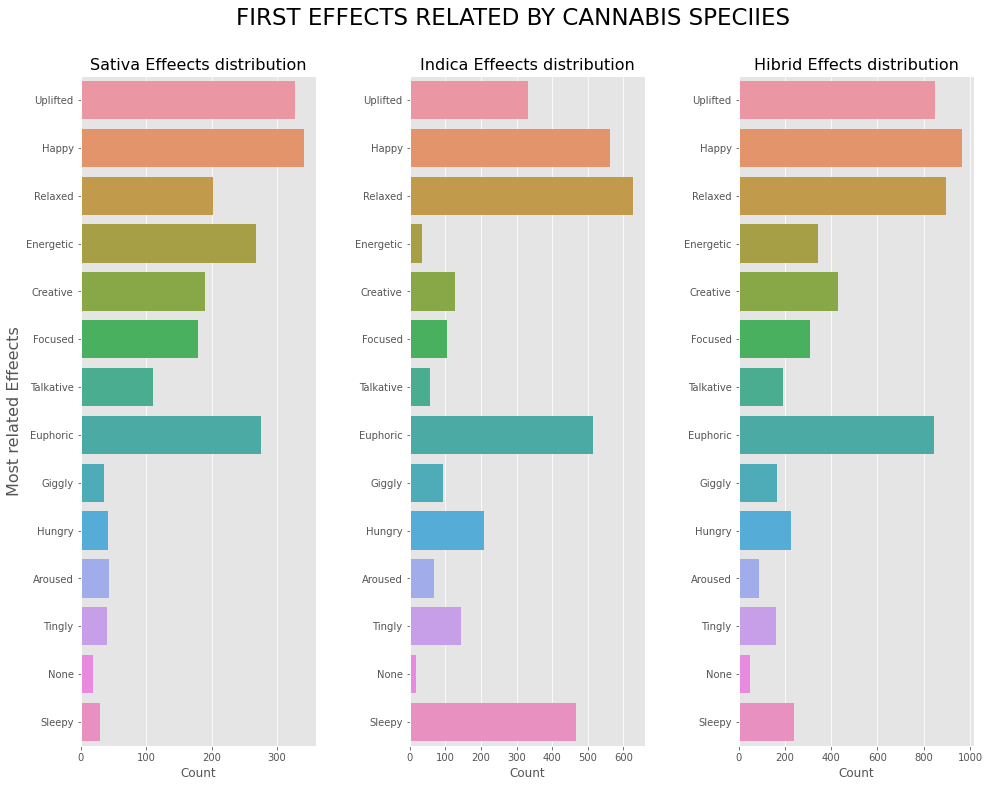

In [21]:
plt.figure(figsize=(16,12))

plt.suptitle('FIRST EFFECTS RELATED BY CANNABIS SPECIIES', fontsize=23)

plt.subplot(131)
g = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=sativa_effects, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related Effeects", fontsize=16)
g.set_title("Sativa Effeects distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=indica_effects, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica Effeects distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values, 
                data=hibridas_effects, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid Effects distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

In [22]:
#Creating flavors to cut each flavor by row inspired in LiamLarsen
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

In [23]:
#Runing flavors counts to sativas
sativa_flavors = flavors(sativas)
sativa_flavors = pd.DataFrame.from_dict(sativa_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_flavors = flavors(indicas)
indica_flavors = pd.DataFrame.from_dict(indica_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_flavors = flavors(hibridas)
hibridas_flavors = pd.DataFrame.from_dict(hibridas_flavors,
                                          orient='index').reset_index().rename(columns={'index': 'flavors',
                                                                                        0:'count'})

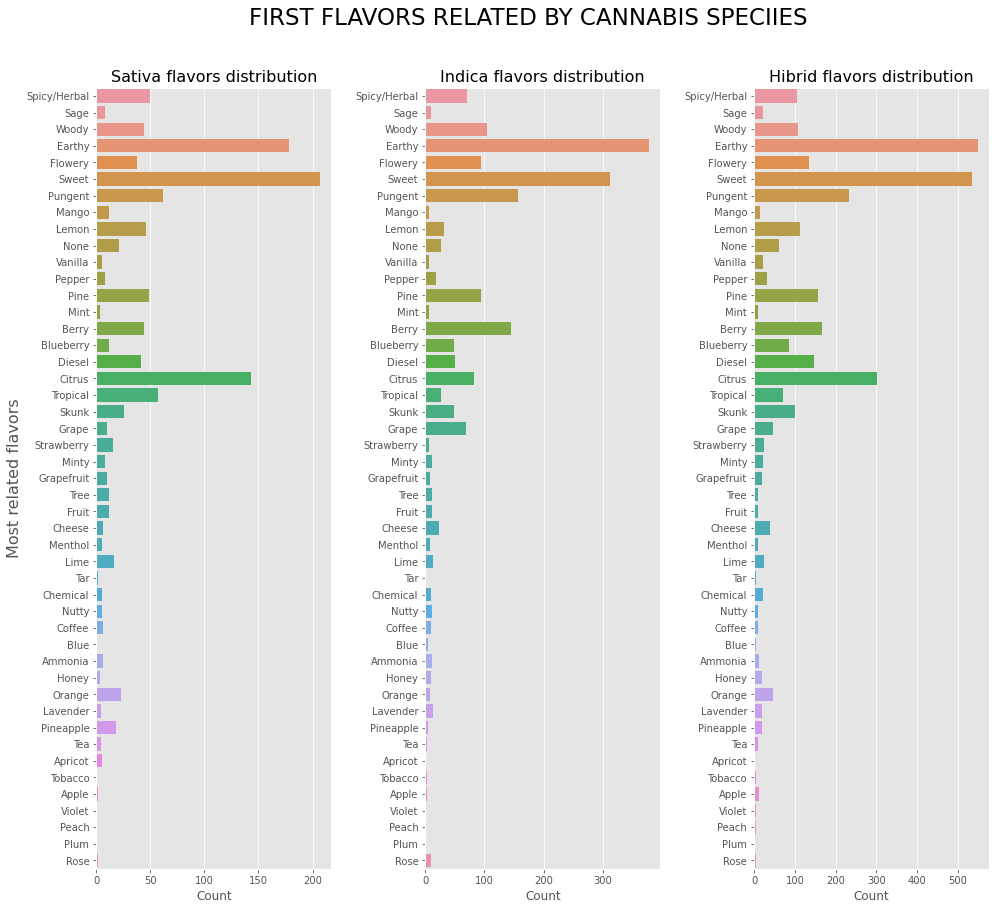

In [24]:
plt.figure(figsize=(16,14))
plt.suptitle('FIRST FLAVORS RELATED BY CANNABIS SPECIIES', fontsize=23)
plt.subplot(131)
g = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=sativa_flavors, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related flavors", fontsize=16)
g.set_title("Sativa flavors distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=indica_flavors, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica flavors distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=hibridas_flavors, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid flavors distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

In [25]:
# geting total words in review
strains['count_word'] = strains["Description"].apply(lambda x: len(str(x).split()))

# geting total letters in review
strains['count_letters'] = strains["Description"].apply(lambda x: len(str(x)))

# geting mean lenght of words
strains["mean_word_len"] = strains["Description"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

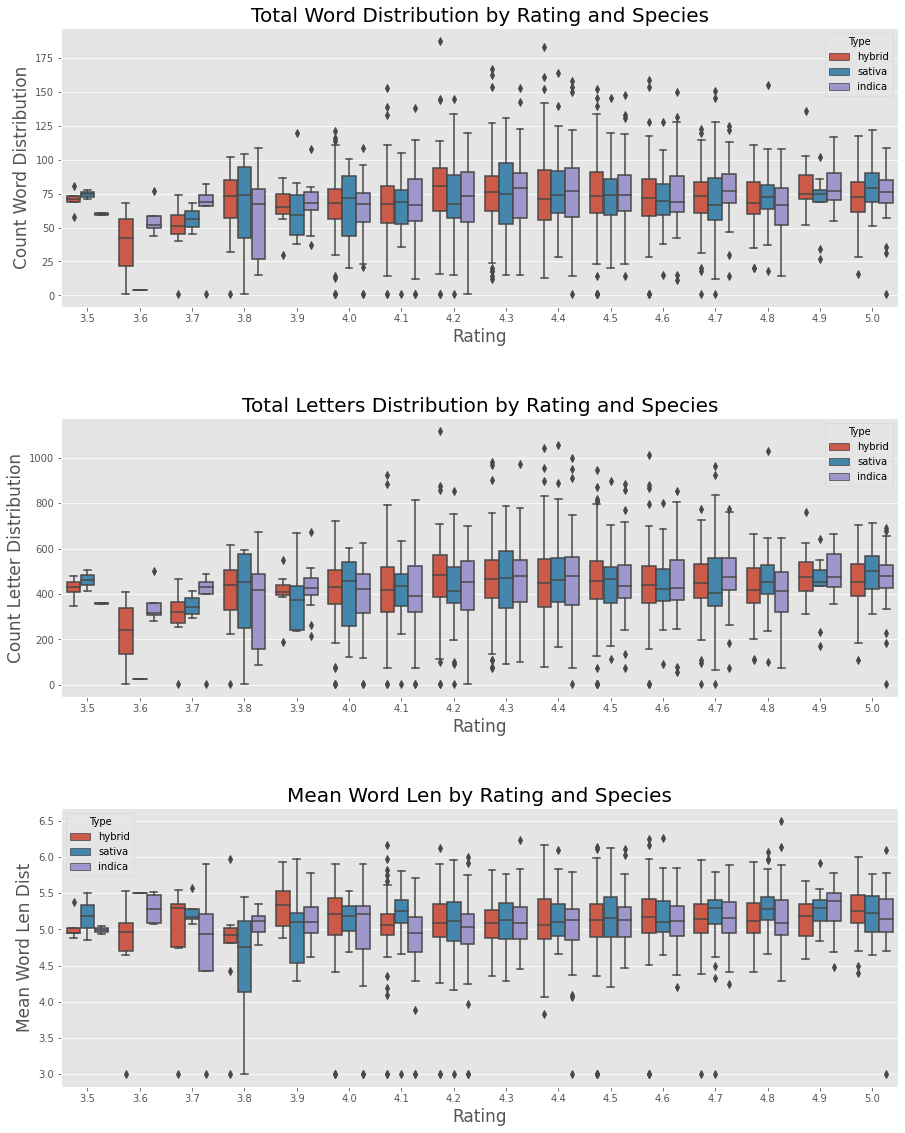

In [26]:
plt.figure(figsize=(15,17))

g = plt.subplot(311)
g = sns.boxplot(x='Rating', y='count_word', 
                hue='Type', data=strains[strains['Rating'] >= 3.5])
g.set_xlabel("Rating", fontsize=17)
g.set_ylabel("Count Word Distribution", fontsize=17)
g.set_title("Total Word Distribution by Rating and Species", 
             fontsize=20)

g1 = plt.subplot(312)
g1 = sns.boxplot(x='Rating', y='count_letters', 
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g1.set_xlabel("Rating", fontsize=17)
g1.set_ylabel("Count Letter Distribution", fontsize=17)
g1.set_title("Total Letters Distribution by Rating and Species", 
             fontsize=20)

g2 = plt.subplot(313)
g2 = sns.boxplot(x='Rating', y='mean_word_len',
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g2.set_xlabel("Rating", fontsize=17)
g2.set_ylabel("Mean Word Len Dist", fontsize=17)
g2.set_title("Mean Word Len by Rating and Species", 
             fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.99)

plt.show()

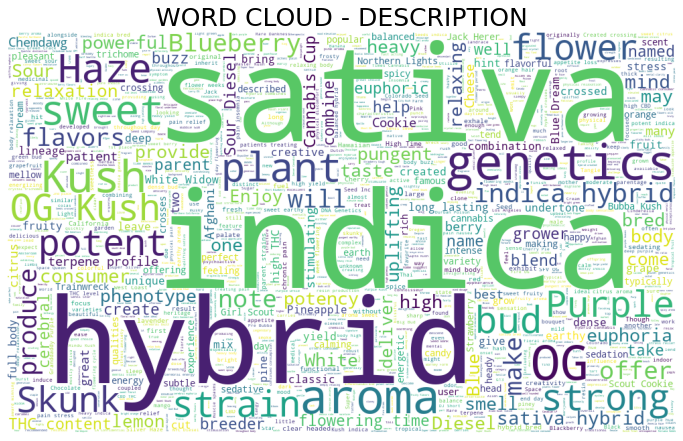

In [27]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

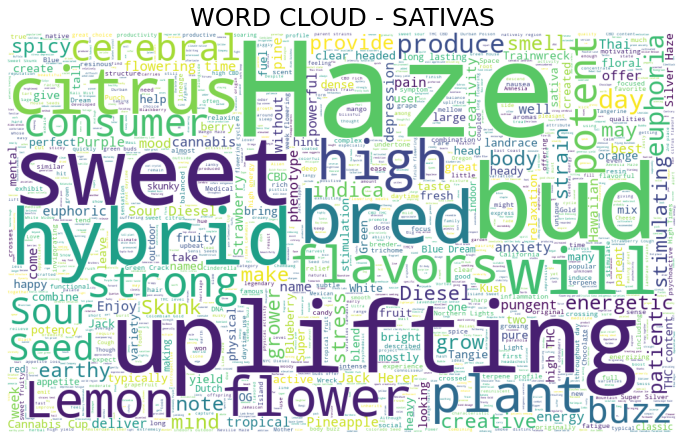

In [28]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

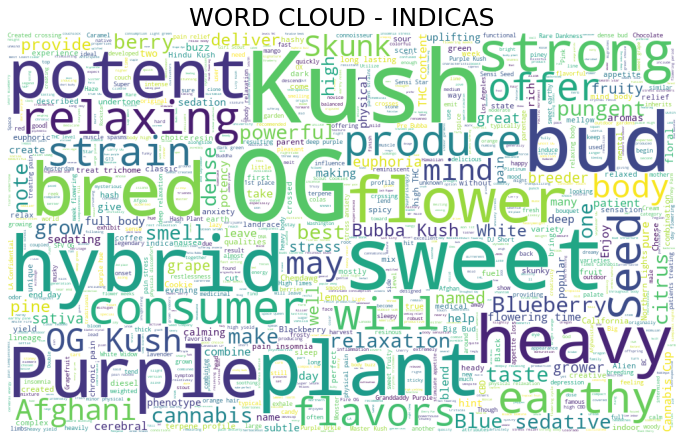

In [29]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

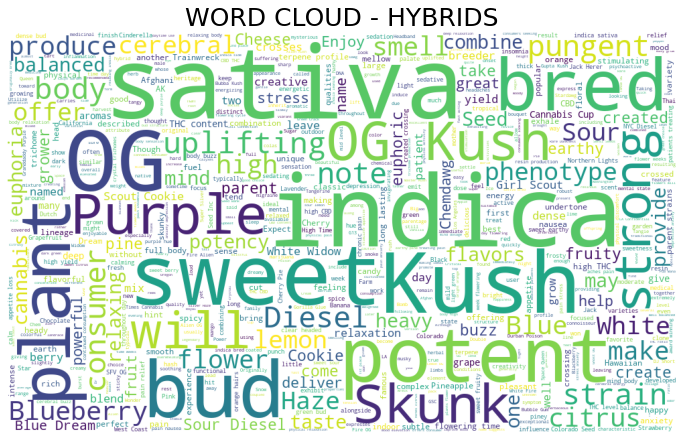

In [30]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()

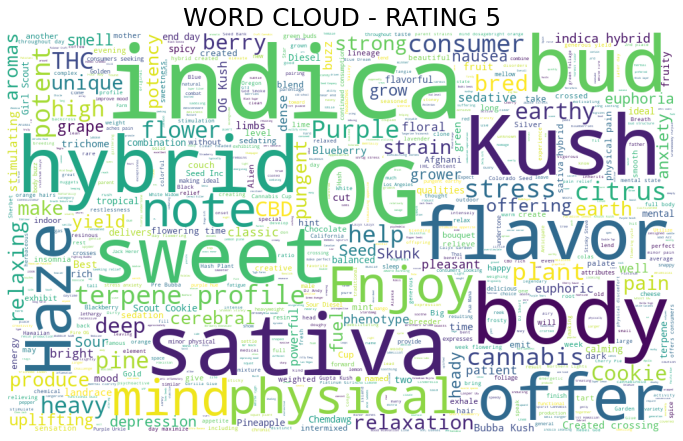

In [31]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic','effects','cross','genetics',
                'aroma','consumer','known','dominant']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Rating == 5]['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - RATING 5", fontsize=25)
plt.axis('off')
plt.show()

In [32]:
#Transformin the Type in numerical 
strains["Type"] = pd.factorize(strains["Type"])[0]
del strains["Description"]

In [35]:
dummy = pd.get_dummies(strains[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])

In [36]:
#Concatenating the result and droping the used variables 
strains = pd.concat([strains, dummy], axis=1)

strains = strains.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4',
                        'Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

strains.shape

(2351, 235)

In [37]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [38]:
# setting X and y
X = strains.drop("Type",1)
y = strains["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [39]:
#Spliting the variables in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 234)
X_test Shape:  (706, 234)


In [40]:
thresh = 5 * 10**(-3.5)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

In [41]:
print("X_important_train Shape: ", X_important_train.shape)
print("X_important_test Shape: ", X_important_test.shape)

X_important_train Shape:  (1645, 83)
X_important_test Shape:  (706, 83)


In [43]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogReg: 0.643769 (+/- 0.030359)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBClassifier: 0.617629 (+/- 0.021006)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.583587 (+/- 0.020882)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTreeClassifier: 0.521581 (+/- 0.018894)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier: 0.596353 (+/- 0.027484)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingClassifier: 0.635258 (+/- 0.018338)
RidgeClassifier: 0.638298 (+/- 0.022664)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BaggingRidgeClassifier: 0.567173 (+/- 0.016604)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesClassifier: 0.594529 (+/- 0.030492)


In [44]:
from sklearn.model_selection import GridSearchCV

params_ridge = {'alpha':[0.001, 0.1, 1.0],
                'tol':[0.1, 0.01, 0.001], 
                'solver':['auto', 'svd', 'cholesky','lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = RidgeClassifier()
    
Ridge_model = GridSearchCV(estimator = ridge, param_grid=params_ridge, 
                           verbose=1, n_jobs = -1, 
                           cv=5)

# Fit the random search model
Ridge_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [45]:
# Printing the Training Score
print("Training score data: ")
print(Ridge_model.score(X_important_train, y_train) )
print("Ridge Best Parameters: ")
print(Ridge_model.best_params_ )

Training score data: 
0.6747720364741642
Ridge Best Parameters: 
{'alpha': 1.0, 'solver': 'auto', 'tol': 0.1}


In [46]:
# Predicting with X_test
Ridge_model = RidgeClassifier(solver='sparse_cg', tol=0.001, alpha=1.0)
Ridge_model.fit(X_important_train, y_train)
y_pred = Ridge_model.predict(X_important_test)

# Print the results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6203966005665722
[[273  36  64]
 [ 88  38   3]
 [ 73   4 127]]
              precision    recall  f1-score   support

         0.0       0.63      0.73      0.68       373
         1.0       0.49      0.29      0.37       129
         2.0       0.65      0.62      0.64       204

    accuracy                           0.62       706
   macro avg       0.59      0.55      0.56       706
weighted avg       0.61      0.62      0.61       706



In [47]:
param_xgb = {
 'n_estimators':[100,150,200],
 'max_depth':[3,4,5,6],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[.1, 0.2, 0.3,0.6,0.7,0.8],
 'colsample_bylevel':[0.2,0.6,0.8]
}

In [48]:
xgb = XGBClassifier()

xgb_model = GridSearchCV(estimator = xgb, 
                        param_grid = param_xgb, 
                        scoring='accuracy',
                        cv=3,
                        verbose = 1)

xgb_model.fit(X_important_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed: 24.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bylevel': [0.2, 0.6, 0.8],
                         'colsample_bytree': [0.1, 0.2, 0.3, 0.6, 0.7, 0.8],
                         'max_depth':

In [49]:
print("Results of the GridSearchCV of XGB: ")

print(xgb_model.best_params_)

print(xgb_model.score(X_important_train, y_train))

Results of the GridSearchCV of XGB: 
{'colsample_bylevel': 0.2, 'colsample_bytree': 0.8, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}
0.7580547112462006


In [50]:
# let's set the best parameters to our model and fit again
xgb = XGBClassifier(colsample_bylevel=0.1, colsample_bytree=.8,
                    objective='multi', max_depth= 4, min_child_weight= 2, 
                    n_estimators= 150)

xgb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = xgb.predict(X_important_test)

# Print the results
print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

METRICS 
Accuracy Score:  0.6274787535410765
[[295  27  51]
 [ 96  31   2]
 [ 85   2 117]]
              precision    recall  f1-score   support

         0.0       0.62      0.79      0.69       373
         1.0       0.52      0.24      0.33       129
         2.0       0.69      0.57      0.63       204

    accuracy                           0.63       706
   macro avg       0.61      0.53      0.55       706
weighted avg       0.62      0.63      0.61       706



In [52]:
import logging
import random

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import re
from keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import load_model
from keras.models import save_model

In [53]:
dataset = strains.values

In [60]:
X = dataset[:,0:5]
y = dataset[:,5]
y = np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [61]:
scaler_x.fit(X)
xscale=scaler_x.transform(X)
scaler_y.fit(y)
yscale=scaler_y.transform(y)

In [62]:
# fit the model
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [65]:
# define the model
model = Sequential()
model.add(Dense(100, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='linear'))

# comiple the model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0323 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0294
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - mae: 0.0325 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0354
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0182 - mse: 0.0182 - mae: 0.0434 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0312
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - mae: 0.0331 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0327
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - mae: 0.0358 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0314
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - mae: 0.0361 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0332
Epoch 7/100
29/29 [===

In [67]:
Xnew = np.array([[10453.0, 2000.0, 2, 1, 97]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[1.0453e+04 2.0000e+03 2.0000e+00 1.0000e+00 9.7000e+01], Predicted=[-203.2901  -234.69797 -307.38348 -335.07837 -240.46326 -246.26324
 -277.6749  -233.21347 -171.93048 -214.64305 -221.75847 -368.38214
 -281.13474 -198.93759 -197.56874 -225.02205 -247.15378 -290.9202
 -252.33499 -225.0877  -297.9956  -210.34245 -200.94118 -339.7449
 -219.64717 -344.72015 -213.6886  -241.24179 -265.98373 -310.2084
 -126.01376 -114.38971 -320.7002  -274.13983 -308.44394 -264.74356
 -263.31305 -207.21643 -236.64874 -288.3516  -178.51247 -285.293
 -213.33076 -233.3667  -260.00507 -275.36398 -198.00876 -169.1701
 -194.51147 -290.08673 -277.48053 -232.43074 -282.37192 -301.0278
 -212.71307 -158.91254 -331.52115 -137.01048 -215.7327  -266.9977
 -227.87083 -325.12607 -208.07144 -288.6689  -243.5328  -175.1082
 -223.07784 -247.94273 -288.4836  -313.40793 -201.30663 -343.7561
 -341.66675 -310.08237 -365.54416 -226.38707 -250.94305 -326.95056
 -123.29488 -267.11108 -241.12834 -216.86205 -274.39523 -236.90794
 -

In [68]:
# make evaluation
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.0122 - mse: 0.0122 - mae: 0.0319


[0.012223242782056332, 0.012223242782056332, 0.03191700577735901]

In [69]:
# save the model
model.save('keras_nn_model.h5')

In [70]:
# load the model
model = load_model('keras_nn_model.h5')

In [71]:
# make prediction
model.predict(Xnew)

array([[-315.6336 , -389.42786, -502.88928, -573.8209 , -387.63055,
        -399.0707 , -482.26886, -372.59314, -263.22632, -342.96582,
        -373.94513, -616.2242 , -463.2926 , -298.81293, -322.90692,
        -349.9883 , -402.32202, -470.37234, -390.88162, -360.86203,
        -468.54233, -317.81403, -334.94577, -567.43524, -349.129  ,
        -539.5969 , -325.31448, -351.21524, -439.18716, -515.2344 ,
        -169.37212, -166.03322, -534.38574, -464.43182, -497.02106,
        -399.066  , -448.9176 , -324.2839 , -371.9109 , -453.0513 ,
        -264.4804 , -482.21472, -306.3965 , -385.55725, -449.8028 ,
        -456.45013, -286.21487, -250.84853, -285.7192 , -468.37924,
        -458.85663, -354.18433, -456.1782 , -495.60855, -336.40866,
        -231.00656, -554.60236, -203.00986, -342.6464 , -432.96713,
        -363.96118, -544.14777, -302.62854, -480.66382, -381.27368,
        -278.13507, -378.83347, -396.87524, -476.8644 , -512.22784,
        -298.4812 , -599.9101 , -562.0767 , -528